In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
df=pd.read_csv('churn.csv')

In [3]:
## Printing the top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
## To show the number of rows and columns
df.shape

(7043, 21)

In [5]:
# Display all the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
##CHeck for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
##statistics info
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# check for the distribution of target variable
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

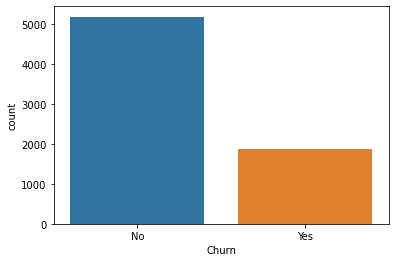

In [9]:
## Visualize the count of customer churn
sns.countplot(df['Churn'])

In [10]:
df.shape[0]

7043

In [11]:
df[df.Churn=='No'].shape[0]

5174

In [12]:
df[df.Churn=='Yes'].shape[0]

1869

In [13]:
## To see the percentage of customers that are leaving
memRetained = df[df.Churn == 'No'].shape[0]
memChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(memRetained/(memRetained + memChurned) * 100,'% of customers stayed in the company')

print("\n")

# print the percentage of customers that left
print(memChurned/(memRetained + memChurned) * 100,'% of customers left with the company')

73.4630129206304 % of customers stayed in the company


26.536987079369588 % of customers left with the company


<AxesSubplot:xlabel='gender', ylabel='count'>

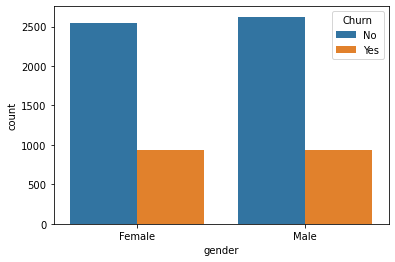

In [14]:
## Visualize the churn count for both males and females
sns.countplot(x='gender',hue='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

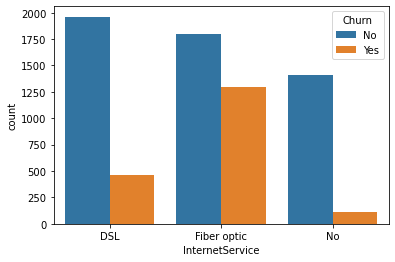

In [15]:
## Visualize the churn count for the internet services
sns.countplot(x='InternetService',hue='Churn',data=df)

In [16]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

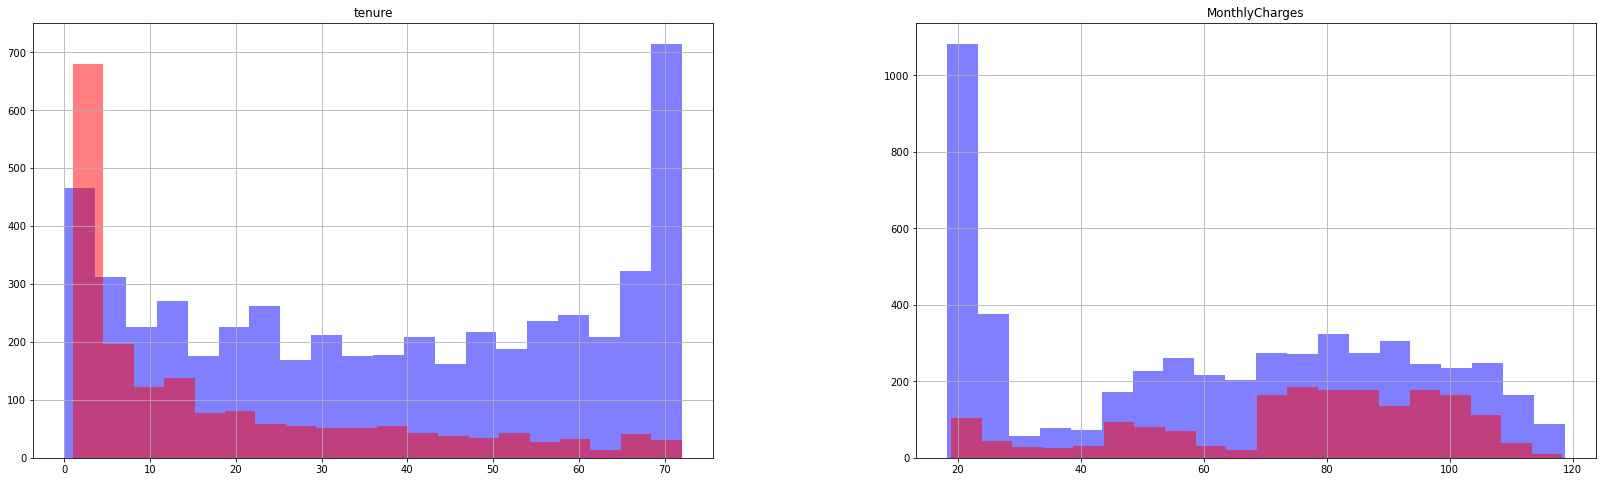

In [17]:
## Visualize numeric data
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='red', alpha=0.5, ax=ax)

In [18]:
## Removing the customer id as we dont require it
df.drop("customerID",axis=1,inplace=True)

In [19]:
# apply label encoding to convert categorical features to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [21]:
df[categorical_features]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [22]:
for column in df[categorical_features]:
    df[column]=le.fit_transform(df[column])

In [23]:
df[categorical_features]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,2994,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,2660,1


In [24]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [25]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [27]:
## Separating independent and dependent features
X=df.drop('Churn',axis=1)
Y=df['Churn']

In [28]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [29]:
X_scale=sc.fit_transform(X)
X_scale

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [30]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [31]:
X_Scale=pd.DataFrame(X_scale,columns=X.columns)

In [32]:
X_Scale.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.398608
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.948762
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.641883
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.983710
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.235224


In [33]:
X=X_scale

In [34]:
## splitting the data into train and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=4)

In [35]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5634, 19) (5634,) (1409, 19) (1409,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
## finding the best random_state
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print('Best accuracy is ',maxaccu, 'on Random_state ',maxRS)

Best accuracy is  0.8239469947941316 on Random_state  24


In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=24)

In [40]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [41]:
predictions=lg.predict(x_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.8225691980127751
[[964  93]
 [157 195]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1057
           1       0.68      0.55      0.61       352

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.82      1409



In [42]:
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    prediction=rfc.predict(x_test)
    acc=accuracy_score(y_test,prediction)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print('Best accuracy is ',maxaccu, 'on Random_state ',maxRS)

Best accuracy is  0.8159015617605301 on Random_state  24


In [43]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrf=rfc.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7870326549929011
[[1385  170]
 [ 280  278]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1555
           1       0.62      0.50      0.55       558

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
scores=cross_val_score(lg,X,Y,cv=5)
print(scores.mean())
print(scores.std())

0.8033525348409574
0.008997355499415601


In [46]:
scoresrf=cross_val_score(rfc,X,Y,cv=5)
print(scoresrf.mean())
print(scoresrf.std())

0.7925617176914639
0.008539708857241013


difference between accuracy score and cross val score is minimum for Random Forset Classfier. So This is our best fit model.

# Hyper parameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {
    'bootstrap': [True],
    'criterion':['gini','entropy'],
    'max_depth': [1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2'],
    'n_estimators': [100,200,300,500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [49]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [50]:
grid_search.best_score_

0.8008093269931815

In [54]:
rfbest=RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=5,max_features='auto',n_estimators=100)
rfbest.fit(x_train,y_train)
predrfbest=rfbest.predict(x_test)
print(accuracy_score(y_test,predrfbest))
print(confusion_matrix(y_test,predrfbest))
print(classification_report(y_test,predrfbest))

0.7931850449597728
[[1428  127]
 [ 310  248]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1555
           1       0.66      0.44      0.53       558

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [55]:
scorerfbest=cross_val_score(rfbest,X,Y,cv=5)

In [57]:
print(scorerfbest.mean())
print(scorerfbest.std())

0.7986665470352926
0.008613551712347907


In [58]:
import pickle

In [59]:
file=open("Customerchurn.pkl","wb")
pickle.dump(rfbest,file)
file.close()

In [60]:
churnpred=pickle.load(open("Customerchurn.pkl","rb"))
predictions=churnpred.predict(x_test)

In [61]:
predictions

array([0, 0, 1, ..., 0, 0, 1])